# **Mount to Drive**

In [173]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Import Library**

In [174]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, precision_score, recall_score, f1_score
from sklearn.metrics import mean_squared_error

# **Load Dataset**

In [175]:
df = pd.read_csv('/content/drive/MyDrive/Kuliah/Dicoding/Datasets/netflix_titles.csv')

In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [177]:
df['date_added'] = pd.to_datetime(df['date_added'], errors= 'coerce')
df['date_added'].dtype

dtype('<M8[ns]')

In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      6173 non-null   object        
 4   cast          7982 non-null   object        
 5   country       7976 non-null   object        
 6   date_added    8709 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8803 non-null   object        
 9   duration      8804 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 825.8+ KB


In [179]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


# **Cek Missing Values**

In [180]:
import pandas as pd

# Cek missing values
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_data = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
})

In [181]:
missing_data

,Missing Values,Percentage
show_id,0,0.000000
type,0,0.000000
title,0,0.000000
director,2634,29.908028
cast,825,9.367549
country,831,9.435676
date_added,98,1.112751
release_year,0,0.000000
rating,4,0.045418
duration,3,0.034064


Terlihat bahwa persentasi missing values yang banyak pada `director` yaitu hampir 30% dan perlu dilakukan handling untuk masing-masing missing values tersebut

# **Handling Missing Values**

In [182]:
# Cek missing values
missing_values = df.isnull().sum()

# Imputasi missing values
df['director'] = df['director'].fillna('Unknown')
df['cast'] = df['cast'].fillna('Unknown')
df['country'] = df['country'].fillna('Unknown')
df['release_year'] = df['release_year'].fillna(df['release_year'].mean())
df['rating'] = df['rating'].fillna(df['rating'].mode()[0])
df['listed_in'] = df['listed_in'].fillna(df['listed_in'].mode()[0])
df['date_added'] = df['date_added'].fillna('Unknown')
df['duration'] = df['duration'].fillna('Unknown')

# **Cek Missing Values Setelah Dilakukan Handing**

In [183]:
missing_values_after = df.isnull().sum()
missing_values_after

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,0
release_year,0
rating,0
duration,0


In [184]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25 00:00:00,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24 00:00:00,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24 00:00:00,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24 00:00:00,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24 00:00:00,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


# **Exploratory Data Analysis**

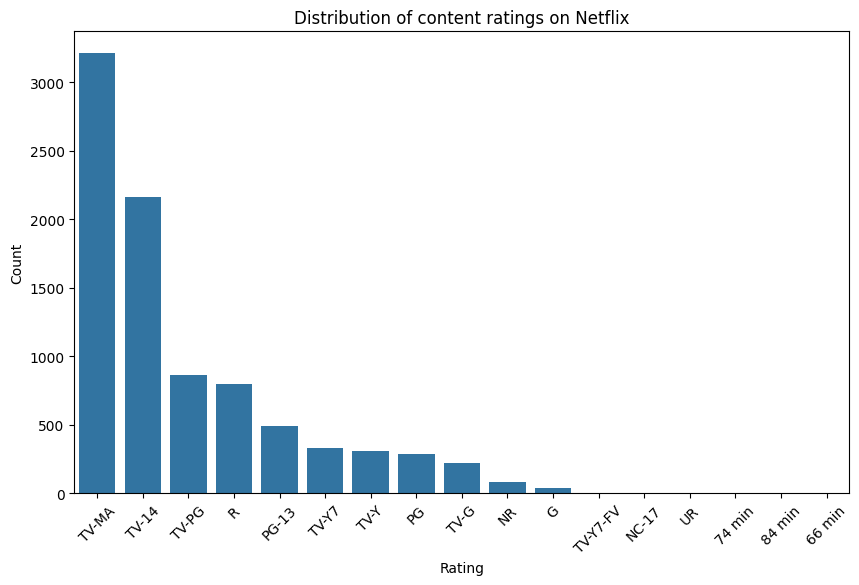

In [185]:
plt.figure(figsize=(10, 6))
sns.countplot(x='rating', order = df['rating'].value_counts().index, data = df)
plt.title('Distribution of content ratings on Netflix')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation = 45)
plt.show()

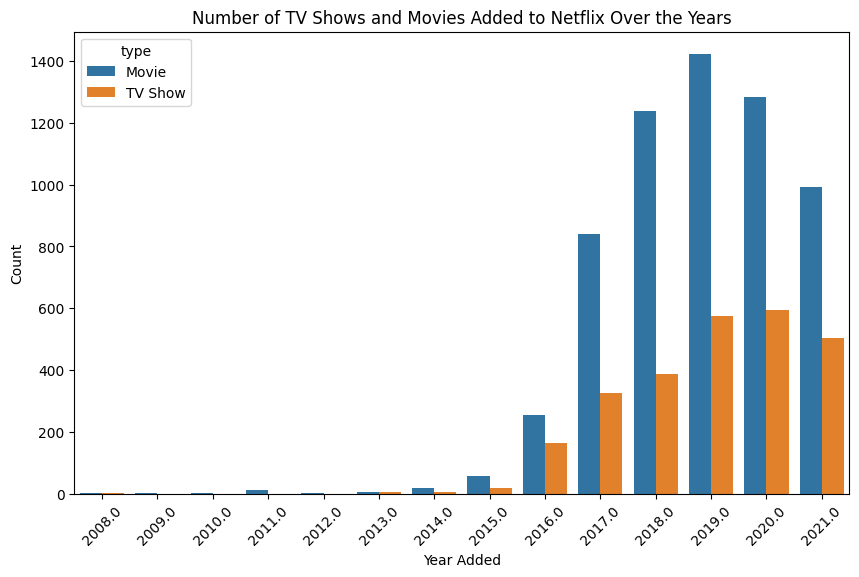

In [186]:
# Convert 'date_added' column to datetime, handling errors
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Now you can extract the month
df['month_added'] = df['date_added'].dt.month

# Extract the year
df['year_added'] = df['date_added'].dt.year  # Extract the year from 'date_added' column

df['year_added'] = df['date_added'].dt.year
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='year_added', hue='type', order=sorted(df['year_added'].dropna().unique()))
plt.title('Number of TV Shows and Movies Added to Netflix Over the Years')
plt.xlabel('Year Added')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      8807 non-null   object        
 4   cast          8807 non-null   object        
 5   country       8807 non-null   object        
 6   date_added    8709 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8807 non-null   object        
 9   duration      8807 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
 12  month_added   8709 non-null   float64       
 13  year_added    8709 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(10)
memory usage: 963.4+ KB


In [188]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",9.0,2021.0
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9.0,2021.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,9.0,2021.0
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",9.0,2021.0
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,9.0,2021.0


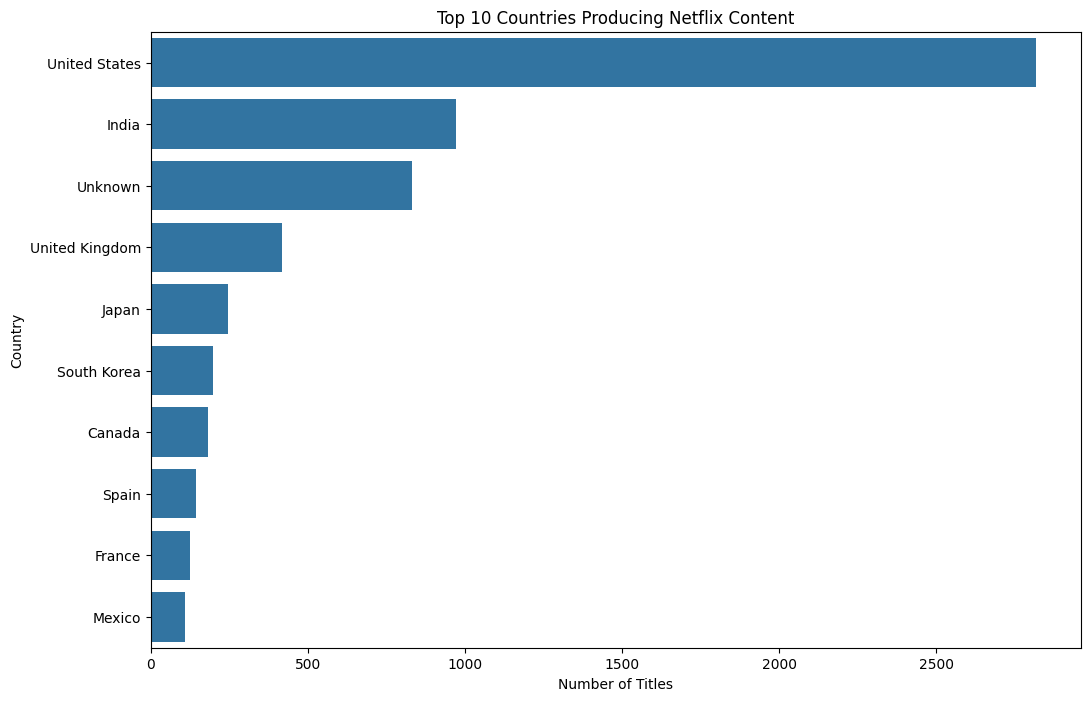

In [189]:
top_countries = df['country'].value_counts().head(10)
plt.figure(figsize=(12, 8))
sns.barplot(x=top_countries.values, y=top_countries.index)
plt.title('Top 10 Countries Producing Netflix Content')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()

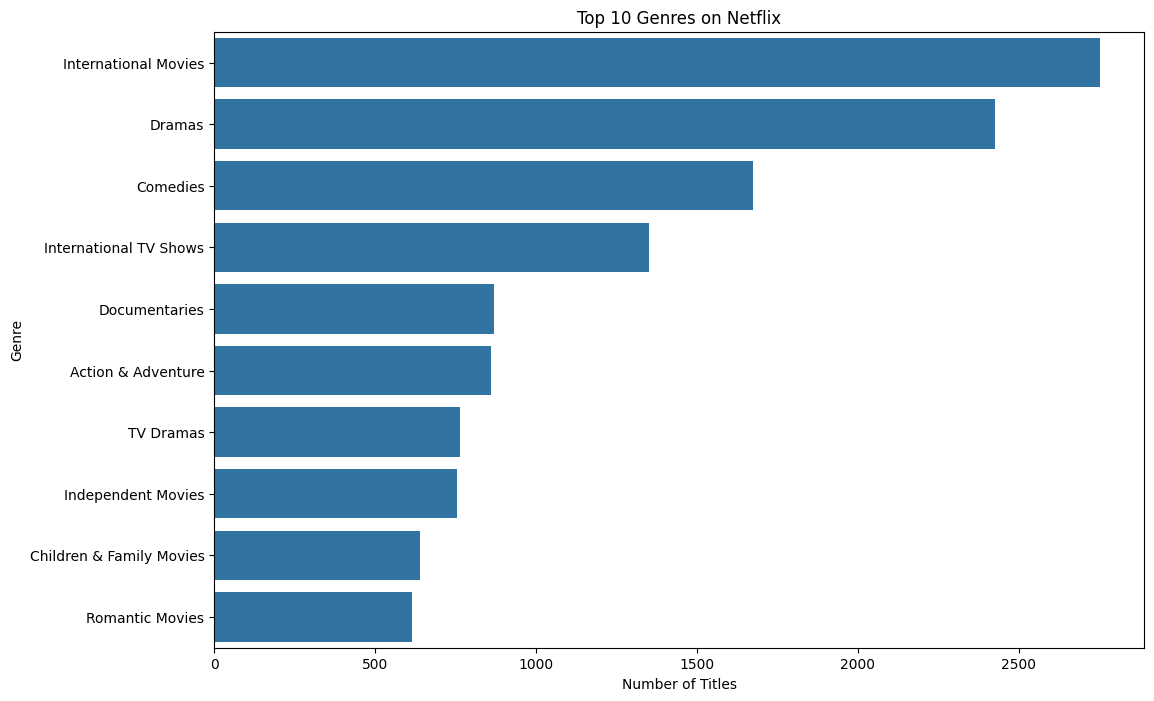

In [190]:
genres = df['listed_in'].str.split(', ', expand=True).stack().value_counts()
plt.figure(figsize=(12, 8))
sns.barplot(x=genres.values[:10], y=genres.index[:10])
plt.title('Top 10 Genres on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Genre')
plt.show()

<ipython-input-191-2e59f6f7b4d9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['duration'] = pd.to_numeric(movies['duration'].str.replace(' min', ''), errors='coerce')


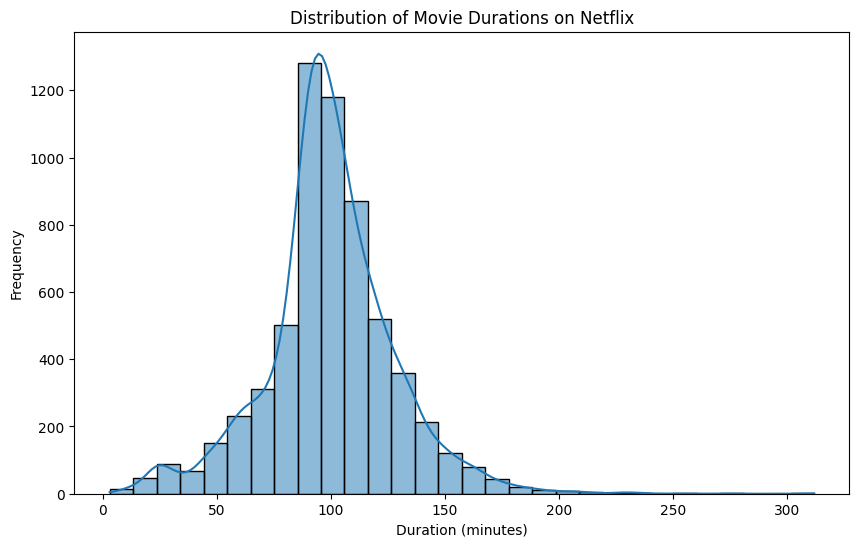

In [191]:
movies = df[df['type'] == 'Movie']
# Replace 'Unknown' with NaN before converting to int
movies['duration'] = pd.to_numeric(movies['duration'].str.replace(' min', ''), errors='coerce')
plt.figure(figsize=(10, 6))
sns.histplot(movies['duration'], bins=30, kde=True)
plt.title('Distribution of Movie Durations on Netflix')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.show()

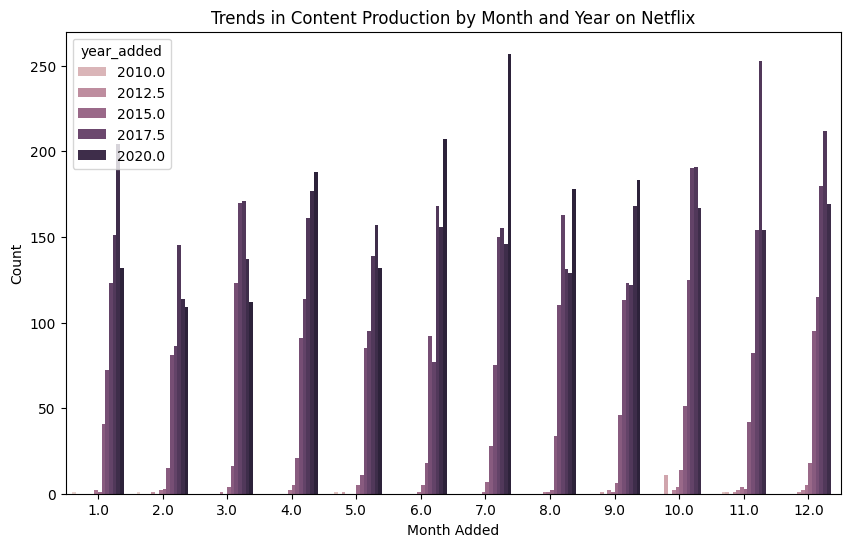

In [192]:
import pandas as pd

# Continue with your plotting code
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='month_added', hue='year_added')
plt.title('Trends in Content Production by Month and Year on Netflix')
plt.xlabel('Month Added')
plt.ylabel('Count')
plt.show()

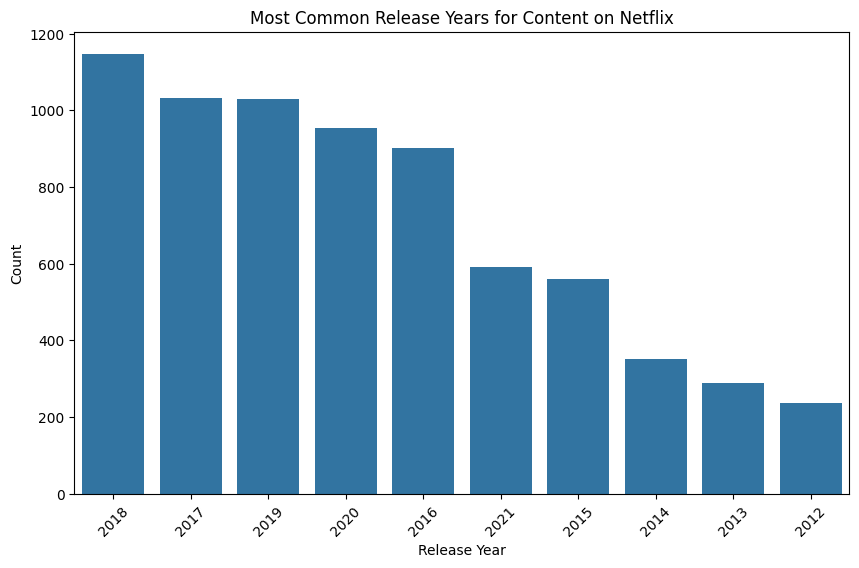

In [193]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='release_year', order=df['release_year'].value_counts().index[:10])
plt.title('Most Common Release Years for Content on Netflix')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

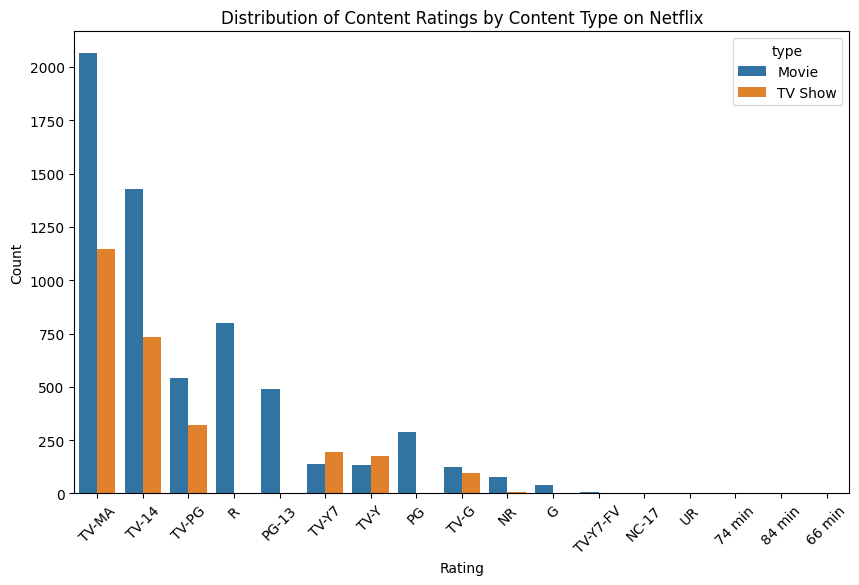

In [194]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='rating', hue='type', order=df['rating'].value_counts().index)
plt.title('Distribution of Content Ratings by Content Type on Netflix')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# **Menggunakan Model Development Content Based Filtering**

# **Feature Engineering**
Setelah menangani missing values, kita akan mengubah kolom yang berisi teks (seperti `description`, `listed_in`, dll.) menjadi fitur numerik menggunakan TF-IDF.

In [195]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

# Gabungkan beberapa fitur teks untuk representasi konten
df['content'] = df['cast'] + " " + df['director'] + " " + df['listed_in'] + " " + df['description']

# Menggunakan TfidfVectorizer untuk mengubah teks menjadi vektor numerik
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(df['content'])

# Cek hasil vektorisasi
print(f"TF-IDF Matrix Shape: {tfidf_matrix.shape}")

TF-IDF Matrix Shape: (8807, 49941)


In [196]:
# Jika ingin melihat matriks secara keseluruhan dalam bentuk dense (penuh), gunakan todense
# Ini akan mengonversi matriks sparse menjadi dense yang bisa dipahami dengan mudah
tfidf_matrix.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [197]:
# Membuat DataFrame dari matriks TF-IDF yang sudah diubah menjadi dense
pd.DataFrame(
    tfidf_matrix.todense(),  # Konversi matriks sparse menjadi dense
    columns=tfidf_vectorizer.get_feature_names_out(),  # Nama fitur yang dihasilkan oleh TfidfVectorizer
    index=df['title']  # Indeks berdasarkan judul film
)

,000,007,009,10,100,1000,102,108,10th,11,...,şçil,şükran,şükrü,šajmovič,šustková,źak,żulewska,żurawski,żygadło,ṣọpẹ
title,,,,,,,,,,,,,,,,,,,,,
Dick Johnson Is Dead,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Blood & Water,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ganglands,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Jailbirds New Orleans,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Kota Factory,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zodiac,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zombie Dumb,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zombieland,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [198]:
# Menghitung cosine similarity pada matriks TF-IDF
cosine_sim = cosine_similarity(tfidf_matrix)

# Membuat DataFrame dari variabel cosine_sim dengan baris dan kolom berupa judul film
cosine_sim_df = pd.DataFrame(cosine_sim, index=df['title'], columns=df['title'])
print(f"Cosine Similarity Matrix Shape: {cosine_sim_df.shape}")

# Melihat similarity matrix untuk beberapa film secara acak
print("Sample Cosine Similarity Matrix:")
print(cosine_sim_df.sample(5, axis=1).sample(10, axis=0))  # Menampilkan beberapa baris dan kolom acak

Cosine Similarity Matrix Shape: (8807, 8807)
Sample Cosine Similarity Matrix:
title                                               The Smurfs 2  \
title                                                              
Glitter Force Doki Doki                                 0.011922   
Skater Girl                                             0.023947   
The Social Network                                      0.000000   
Midnight Diner                                          0.000000   
Teach Us All                                            0.000000   
The Accountant of Auschwitz                             0.002014   
Rumble                                                  0.001532   
Freud                                                   0.000000   
John Leguizamo's Latin History for Morons               0.000000   
Judah Friedlander: America Is the Greatest Coun...      0.000000   

title                                               Chhota Bheem & Krishna: Mayanagari  \
title          

# **Sistem Rekomendasi**

In [199]:
# Menghitung cosine similarity antara semua film
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Membuat fungsi untuk mendapatkan rekomendasi
def get_recommendations(title, cosine_sim=cosine_sim):
    # Menemukan indeks film berdasarkan judul
    idx = df.index[df['title'] == title].tolist()[0]

    # Mendapatkan skor similaritas untuk semua film berdasarkan indeks
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Urutkan film berdasarkan skor similarity (descending)
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Ambil 10 film teratas yang mirip, selain film itu sendiri
    sim_scores = sim_scores[1:11]

    # Ambil indeks film
    movie_indices = [i[0] for i in sim_scores]

    # Return 10 rekomendasi film teratas
    return df['title'].iloc[movie_indices]

# Cek rekomendasi berdasarkan judul film
print(get_recommendations('Breaking Bad'))


2931                             Better Call Saul
8505                                     The Show
355                            The Lincoln Lawyer
5352    Have You Ever Fallen in Love, Miss Jiang?
5606                             Girlfriend's Day
6841                                   Get Shorty
5885                               W/ Bob & David
430                                   Sexy Beasts
5703                                  Refresh Man
2606                              Extracurricular
Name: title, dtype: object


In [200]:
title = input("Masukkan judul film: ")
recommendations = get_recommendations(title)
print(recommendations)

Masukkan judul film: Refresh Man
5766                 Fall in Love with Me
5665                       Color of Woman
5762                           Be with Me
5700                             Bromance
8721                        What Is Love?
7468                            Miss Rose
3368     A Little Thing Called First Love
1038                       Dancing Angels
5598    Love for Ten: Generation of Youth
5730                          Love Family
Name: title, dtype: object


# **Menggunakan Model Development Collaborative Filtering**

In [201]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Embedding, Flatten, Input, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [202]:
df2 = pd.read_csv('/content/drive/MyDrive/Kuliah/Dicoding/Datasets/netflix_titles.csv')

In [203]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [204]:
import pandas as pd

# Cek missing values
missing_values = df2.isnull().sum()
missing_percentage = (missing_values / len(df2)) * 100
missing_data = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
})

In [205]:
missing_data

,Missing Values,Percentage
show_id,0,0.000000
type,0,0.000000
title,0,0.000000
director,2634,29.908028
cast,825,9.367549
country,831,9.435676
date_added,10,0.113546
release_year,0,0.000000
rating,4,0.045418
duration,3,0.034064


In [206]:
# Cek missing values
missing_values = df2.isnull().sum()
missing_values

# Imputasi missing values
df2['director'] = df2['director'].fillna('Unknown')
df2['cast'] = df2['cast'].fillna('Unknown')
df2['country'] = df2['country'].fillna('Unknown')
df2['release_year'] = df2['release_year'].fillna(df2['release_year'].mean())
df2['rating'] = df2['rating'].fillna(df2['rating'].mode()[0])
df2['listed_in'] = df2['listed_in'].fillna(df2['listed_in'].mode()[0])
df2['date_added'] = df2['date_added'].fillna('Unknown')
df2['duration'] = df2['duration'].fillna('Unknown')

In [207]:
missing_values

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


In [208]:
# Membuat userId secara acak (misalnya ada 1000 pengguna)
df2['userId'] = np.random.randint(1, 1001, df2.shape[0])

# Menggunakan show_id sebagai movieId
df2['movieId'] = df2['show_id'].astype('category').cat.codes  # Mengubah show_id menjadi movieId unik

# Menangani missing values untuk rating (misalnya impute dengan rating mode)
df2['rating'] = df2['rating'].fillna('Unrated')  # Jika rating missing, beri label 'Unrated'
df2 = df2[df2['rating'] != 'Unrated']  # Menghapus film yang tidak memiliki rating

# Encode rating ke angka untuk model
rating_mapping = {'Unrated': 0, 'G': 1, 'PG': 2, 'PG-13': 3, 'R': 4, 'NC-17': 5}
df2.loc[:, 'rating'] = df2['rating'].map(rating_mapping).fillna(0).astype(int)  # Gunakan .loc untuk perubahan yang aman

# Pilih kolom yang diperlukan untuk collaborative filtering
df_collab = df2[['userId', 'movieId', 'rating']]

# Cek data
df_collab.head()

,userId,movieId,rating
0,271,0,3
1,502,1111,0
2,863,2222,0
3,762,3333,0
4,944,4444,0


In [209]:
# Split data menjadi train dan test
train_data, test_data = train_test_split(df_collab, test_size=0.2, random_state=42)

# Menyiapkan input data untuk model
train_user_input = train_data['userId'].values
train_item_input = train_data['movieId'].values
train_ratings = train_data['rating'].values

test_user_input = test_data['userId'].values
test_item_input = test_data['movieId'].values
test_ratings = test_data['rating'].values

# **Neural Collaborative Filtering (NCF)**
Pendekatan dalam sistem rekomendasi berbasis deep learning. Model ini memanfaatkan embedding untuk merepresentasikan pengguna dan item dalam ruang vektor berdimensi rendah, dan kemudian menggabungkannya untuk memprediksi interaksi (rating) antara pengguna dan item.

In [210]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Flatten, Dense
from tensorflow.keras.optimizers import Adam
import numpy as np
import tensorflow as tf # Import tensorflow
from tensorflow.keras.metrics import MeanSquaredError
import tensorflow.keras.backend as K # Import Keras backend as K

# Tentukan jumlah pengguna dan item unik
num_users, num_items = df_collab['userId'].nunique(), df_collab['movieId'].nunique()

# Hyperparameters
embedding_dim = 50

# Membatasi userId dan movieId sesuai rentangnya
train_user_input = np.clip(train_user_input, 0, num_users - 1)
train_item_input = np.clip(train_item_input, 0, num_items - 1)

# Cek dimensi dan validasi
assert train_user_input.min() >= 0 and train_user_input.max() <= num_users - 1, "User ID tidak valid!"
assert train_item_input.min() >= 0 and train_item_input.max() <= num_items - 1, "Movie ID tidak valid!"
train_user_input = train_user_input.flatten()
train_item_input = train_item_input.flatten()

# Membuat input layer untuk user dan item
user_input = Input(shape=(1,), dtype=tf.int32)
item_input = Input(shape=(1,), dtype=tf.int32)

# Embedding layer untuk user dan item
user_embedding = Embedding(input_dim=num_users, output_dim=embedding_dim)(user_input)
item_embedding = Embedding(input_dim=num_items, output_dim=embedding_dim)(item_input)

# Flattening embedding layer untuk dihubungkan ke dense layer
user_vec = Flatten()(user_embedding)
item_vec = Flatten()(item_embedding)

# Menggabungkan user dan item embedding
merged = tf.keras.layers.concatenate([user_vec, item_vec])

# Fully connected layer untuk menghasilkan prediksi rating
x = Dense(128, activation='relu')(merged)
x = Dense(64, activation='relu')(x)
output = Dense(1)(x)

# Fungsi untuk menghitung RMSE
def rmse(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true))) # Now K is defined

# Membuat dan kompilasi model
model = Model(inputs=[user_input, item_input], outputs=output)

# Compile model dengan MSE dan RMSE sebagai metrik
model.compile(optimizer=Adam(), loss='mean_squared_error', metrics=[MeanSquaredError(), rmse])

# Menampilkan summary model
model.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_6             │ (None, 1)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_7             │ (None, 1)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_6 (Embedding)   │ (None, 1, 50)          │         50,000 │ input_layer_6[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_7 (Embedding)   │ (None, 1, 50)          │        440,350 │ input_layer_7[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_10 (Flatten)      │ (None, 50)             │              0 │ embedding_6[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_11 (Flatten)      │ (None, 50)             │              0 │ embedding_7[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_3             │ (None, 100)            │              0 │ flatten_10[0][0],      │
│ (Concatenate)             │                        │                │ flatten_11[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_9 (Dense)           │ (None, 128)            │         12,928 │ concatenate_3[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_10 (Dense)          │ (None, 64)             │          8,256 │ dense_9[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_11 (Dense)          │ (None, 1)              │             65 │ dense_10[0][0]         │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 511,599 (1.95 MB)

 Trainable params: 511,599 (1.95 MB)

 Non-trainable params: 0 (0.00 B)

In [211]:
# Pastikan train_ratings memiliki tipe data yang sesuai
train_ratings = train_ratings.astype(np.float32)

# Melatih model
history = model.fit(
    [train_user_input, train_item_input],  # dua input
    train_ratings,  # target ratings
    epochs=30,
    batch_size=64
)

Epoch 1/30
111/111 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 1.9242 - mean_squared_error: 1.9242 - rmse: 1.3734
Epoch 2/30
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.3081 - mean_squared_error: 1.3081 - rmse: 1.3510
Epoch 3/30
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.2422 - mean_squared_error: 0.2422 - rmse: 1.8269
Epoch 4/30
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0958 - mean_squared_error: 0.0958 - rmse: 1.8389
Epoch 5/30
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0296 - mean_squared_error: 0.0296 - rmse: 1.8262
Epoch 6/30
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0099 - mean_squared_error: 0.0099 - rmse: 1.8332
Epoch 7/30
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0056 - mean_squared_error: 0.0056 - rmse: 1.8144
Epoch 8/30
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0054 - mean_squared_error: 0.0054 - rmse: 1.8610
Epoch 9/30
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0049 - mean_squared_error: 0.0049 - rmse: 1.86

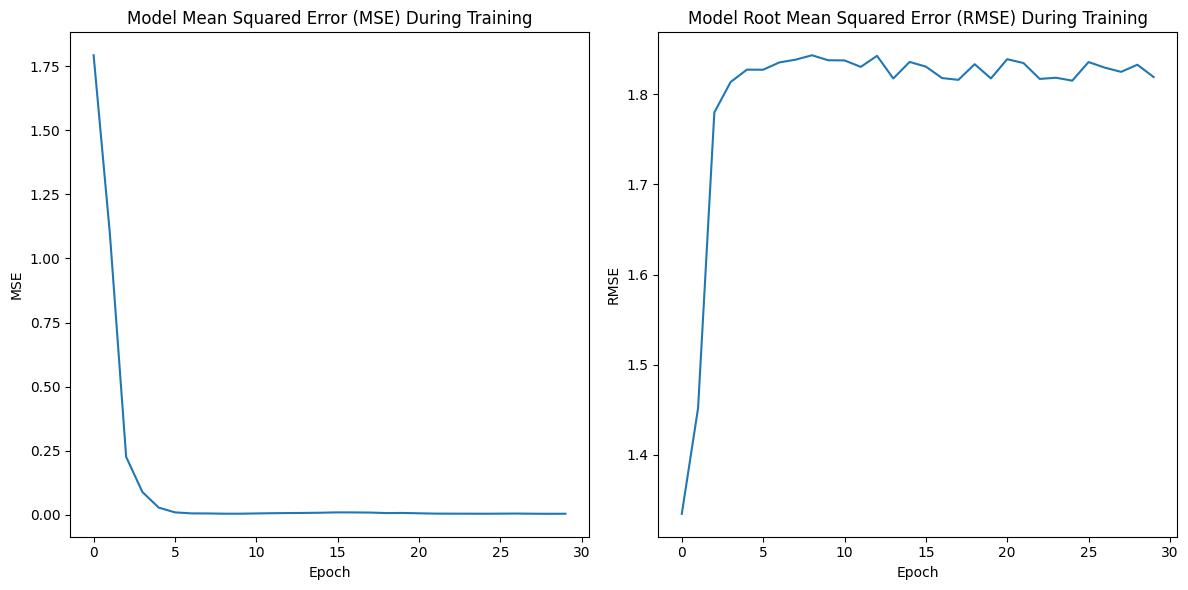

In [212]:
import matplotlib.pyplot as plt

# Mengambil data MSE dan RMSE dari history
mse = history.history['mean_squared_error']
rmse = history.history['rmse']

# Membuat plot MSE selama training
plt.figure(figsize=(12, 6))

# Plot MSE
plt.subplot(1, 2, 1)
plt.plot(mse)
plt.title('Model Mean Squared Error (MSE) During Training')
plt.xlabel('Epoch')
plt.ylabel('MSE')

# Plot RMSE
plt.subplot(1, 2, 2)
plt.plot(rmse)
plt.title('Model Root Mean Squared Error (RMSE) During Training')
plt.xlabel('Epoch')
plt.ylabel('RMSE')

plt.tight_layout()
plt.show()

In [213]:
import numpy as np

# Fungsi untuk mendapatkan rekomendasi film berdasarkan prediksi rating
def get_movie_recommendations(user_id, num_recommendations=10):
    # Menghasilkan semua pasangan (user, movieId) yang mungkin
    movie_ids = np.arange(num_items)  # Semua movieId
    user_ids = np.full_like(movie_ids, user_id)  # Menambahkan user_id yang sama untuk setiap movieId

    # Memprediksi rating untuk semua pasangan (user_id, movie_id)
    predicted_ratings = model.predict([user_ids, movie_ids], verbose=0)

    # Mengurutkan hasil prediksi berdasarkan rating yang tertinggi
    recommended_movie_ids = movie_ids[np.argsort(predicted_ratings.flatten())[::-1]]

    # Ambil beberapa film teratas
    recommended_movie_ids = recommended_movie_ids[:num_recommendations]

    return recommended_movie_ids

In [214]:
# Contoh: Mendapatkan 10 rekomendasi film untuk user dengan ID tertentu
user_id = 70  # Ganti dengan user ID yang ingin direkomendasikan
recommended_movies = get_movie_recommendations(user_id, num_recommendations=10)

# Menampilkan rekomendasi film beserta judulnya
print(f"Top 10 rekomendasi film untuk user {user_id}:")
for movie_id in recommended_movies:
    # Mendapatkan judul film berdasarkan movie_id dari dictionary
    title = df2[df2['movieId'] == movie_id]['title'].values[0]
    print(f"Movie ID: {movie_id}, Title: {title}")

Top 10 rekomendasi film untuk user 70:
Movie ID: 5933, Title: Blue Is the Warmest Color
Movie ID: 6961, Title: Lady-Like
Movie ID: 4740, Title: Swearnet: The Movie
Movie ID: 1941, Title: The Runaways
Movie ID: 6535, Title: GoodFellas
Movie ID: 6066, Title: Chernobyl Diaries
Movie ID: 5666, Title: Aftershock
Movie ID: 8332, Title: The Score
Movie ID: 8023, Title: The Wedding Guest
Movie ID: 2332, Title: Doom: Annihilation
